# AB test experiments

Проведем ряд экспериментов для более глубокого понимания принципов проведения АБ-тестирования и применяемых для этого статистических методов

## Распределение p-value для выборок из одной генеральной совокупности 

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind
from tqdm.notebook import tqdm
from matplotlib.pyplot import plot
import seaborn as sns

Сгенерируем две выборки с нормальным распределением с одинаковыми параметрами (среднее 10, стандартное отклонение 1, размер выборки 1000), т.е. выборки принадлежат одной генеральной совокупности

In [2]:
r_1 = np.random.normal(10, 1, 1000)
r_2 = np.random.normal(10, 1, 1000)

Построим гистограммы полученных распределений

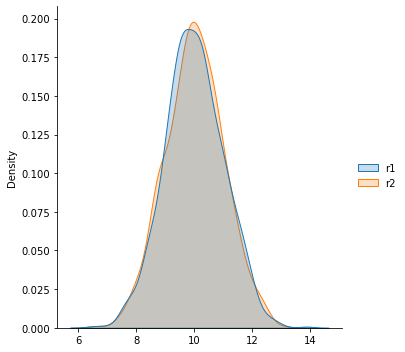

In [3]:
sns.displot(pd.DataFrame(r_1, columns=['r1']).join(pd.DataFrame(r_2, columns=['r2'])), kind='kde', fill=True)

In [4]:
result = ttest_ind(r_1, r_2)
result

Ttest_indResult(statistic=-0.10430410384106242, pvalue=0.9169384900516593)

Что же такое `p-value`: Если мы не отвергаем H0 (т.е. считаем что обе выборки принадлежат одной генеральной совокупности), то с вероятностью `p-value` мы бы могли получить такие выборки или еще более отличающиеся.
P-value обычно сравнивают со значением статистической значимости = 0.05 (5%) или 0.01 (1%).

Пусть в качестве границы выбрали 0.05  
Тогда:  
Если **p-value>0.05**, то нулевую  гипотезу **не отвергаем**. Нулева гипотеза говорит о том что выборки принадлежат одной генеральной совокупности и разница между ними не статистически значима.  
Если **p-value<0.05**, то нулевую  гипотезу **отвергаем**. Соответственно считаем что выборки не принадлежат одной генеральной совокупности (более корректноый тезис - считаем что не подтвердилась гипотеза о принадлежности выборок одной генеральной совокупности).

Интересный факт - если рассчитывать p-value для случайных выборок из одной генеральной совокупности, то получим равномерное распределение. Давайте его подтвердим.

In [5]:
%%time
p_val_list = []
for i in tqdm(range(100000)):
    norm_1 = np.random.normal(100, 10, 10000)
    norm_2 = np.random.normal(100, 10, 10000)
    result = ttest_ind(norm_1, norm_2)
    p_val_list.append(result[1])   

  0%|          | 0/100000 [00:00<?, ?it/s]

Wall time: 1min 15s


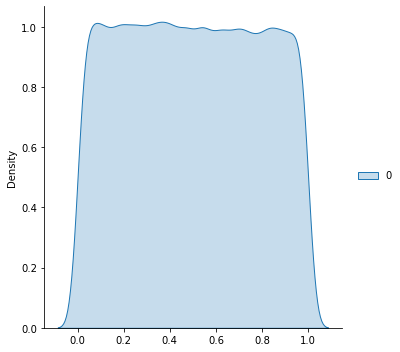

In [8]:
sns.displot(pd.DataFrame(p_val_list), kind='kde', fill=True)
#pd.DataFrame(p_val_list).hist(bins=100)

**Мы видим равномерное распределение!!!**

**Таким образом, при любом выборе уровня статистической значимости мы можем ошибиться.**  
Например, при уровне статистической значимости 0.05 мы получили p-value 0.04999 и отвергли нулевую гипотезу (т.е. считаем что гипотеза о принадлежности выборок одной генеральной совокупности не верна).    
**Вспоминаем о том, что получили равномерное распределение для p-value выборок из одной генеральной совокупности => с вероятностью в 5% мы ошиблись (в 1 случае из 20 мы ошибочно отвергаем нулевую гипотезу, т.е. такие выборки могли бы быть получены из одной генеральной совокупности)**

## Распределение p-value для выборок из одной генеральной совокупности 

В работе